In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataframe
df = pd.read_csv('vehicle-1.csv')
df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

The columns are the geometric representation of silhouette images of car, bus, and van.

The NaN values are presented in dataframe.

In [3]:
# Find the target column and get the unique rows in target column.
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [4]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

Most of the columns are int and float except the target column.

In [5]:
# Find how many rows and columns
df.shape

(846, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [7]:
# Finding the Null values in all columns
for i in df:
    a = df[i].isnull().sum()
    b = df[i].isna().sum()
    if a == b:
        print("NaN value in column",i, 'is: -', a)
    else:
        print("No NaN value in column",i, 'is: -', a)

NaN value in column compactness is: - 0
NaN value in column circularity is: - 5
NaN value in column distance_circularity is: - 4
NaN value in column radius_ratio is: - 6
NaN value in column pr.axis_aspect_ratio is: - 2
NaN value in column max.length_aspect_ratio is: - 0
NaN value in column scatter_ratio is: - 1
NaN value in column elongatedness is: - 1
NaN value in column pr.axis_rectangularity is: - 3
NaN value in column max.length_rectangularity is: - 0
NaN value in column scaled_variance is: - 3
NaN value in column scaled_variance.1 is: - 2
NaN value in column scaled_radius_of_gyration is: - 2
NaN value in column scaled_radius_of_gyration.1 is: - 4
NaN value in column skewness_about is: - 6
NaN value in column skewness_about.1 is: - 1
NaN value in column skewness_about.2 is: - 1
NaN value in column hollows_ratio is: - 0
NaN value in column class is: - 0


In [8]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

Due to the null values presented in our dataset, this is not an accurate description.

In [9]:
data = df.iloc[:, :18] # Removing the target class and storing in new dataframe 

In [10]:
# Separating  column names from the dataframe and storing into a new variable 
data_col = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 
            'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 
           'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about',
           'skewness_about.1', 'skewness_about.2', 'hollows_ratio']

In [11]:
# Filling NaN values with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(data)
data = imputer.transform(data)

In [12]:
# Imputer makes dataframe into an array so we have to make another new dataframe
data = pd.DataFrame(data = data, columns = data_col)
data.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   
5        107.0         56.6                 106.0         172.0   
6         97.0         43.0                  73.0         173.0   
7         90.0         43.0                  66.0         157.0   
8         86.0         34.0                  62.0         140.0   
9         93.0         44.0                  98.0         194.8   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                 103.0                     52.0          149.0   
5                  50.0                      6.0          255.0   
6                  65.0                      6.0          153.0   
7                  65.0                      9.0          137.0   
8                  61.0                      7.0          122.0   
9                  62.0                     11.0          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   
5           26.0                    28.0                      169.0   
6           42.0                    19.0                      143.0   
7           48.0                    18.0                      146.0   
8           54.0                    17.0                      127.0   
9           36.0                    22.0                      146.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio  
0             187.0          197.0  
1             189.0          199.0  
2             188.0          196.0  
3             199.0          207.0  
4             180.0          183.0  
5             181.0      

In [13]:
# Check if there any NaN value presented or not
a = data.isnull().sum()
a = a.sum()
if a > 0:
    Print('There is NaN value presented in columns.')
else:
    print('There is no NaN value presented in columns.')

There is no NaN value presented in columns.


In [14]:
# Performing the five number of summary
from IPython.display import display
display(data.describe().T)
print('\nThe description about data:-\n')
for j in data:
    mean = int(data[j].mean())
    median = int(data[j]. median())
    if mean < median:
        print("The column {} is left skew.".format(j))
    elif mean == median:
        print("The column {} is slightly normally distributed.".format(j))
    else:
        print('The column {} is right skew.'.format(j))

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.863593    6.168941   33.0   40.00   
distance_circularity         846.0   82.096454   15.773256   40.0   70.00   
radius_ratio                 846.0  168.955319   33.457694  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.691489    7.886364   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.839480   33.244603  112.0  146.25   
elongatedness                846.0   40.934043    7.811565   26.0   33.00   
pr.axis_rectangularity       846.0   20.582742    2.592138   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.625059   31.403068  130.0  167.00   
scaled_variance.1            846.0  439.921749  176.707508  184.0  318.25   
scaled_radius_of_gyration    846.0  174.710402   32.546320  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.464775    7.482148   59.0   67.00   
skewness_about               846.0    6.367376    4.908264    0.0    2.00   
skewness_about.1             846.0   12.599764    8.931113    0.0    5.00   
skewness_about.2             846.0  188.926950    6.155954  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              178.5  217.0   320.0  
scaled_variance.1            364.0  587.0  1018.0  
scaled_radius_of_gyration    173.7  198.0   268.0  
scaled_radius_of_gyration.1   72.0   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0


The description about data:-

The column compactness is slightly normally distributed.
The column circularity is slightly normally distributed.
The column distance_circularity is right skew.
The column radius_ratio is right skew.
The column pr.axis_aspect_ratio is slightly normally distributed.
The column max.length_aspect_ratio is slightly normally distributed.
The column scatter_ratio is right skew.
The column elongatedness is left skew.
The column pr.axis_rectangularity is slightly normally distributed.
The column max.length_rectangularity is right skew.
The column scaled_variance is right skew.
The column scaled_variance.1 is right skew.
The column scaled_radius_of_gyration is right skew.
The column scaled_radius_of_gyration.1 is slightly normally distributed.
The column skewness_about is slightly normally distributed.
The column skewness_about.1 is right skew.
The column skewness_about.2 is slightly normally distributed.
The column hollows_ratio is left skew.


Most of the attributes are right skewed and few are left skewed, but some attributes which are slightly normally distributed will make our model robust.

In [15]:
# Append the target column in dataframe
target_val = df['class']
data = data.join(target_val)

In [16]:
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                 103.0                     52.0          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0          197.0   van  
1             189.0          199.0   van  
2             188.0          196.0   car  
3             199.0          207.0   van  
4             180.0          183.0   bus

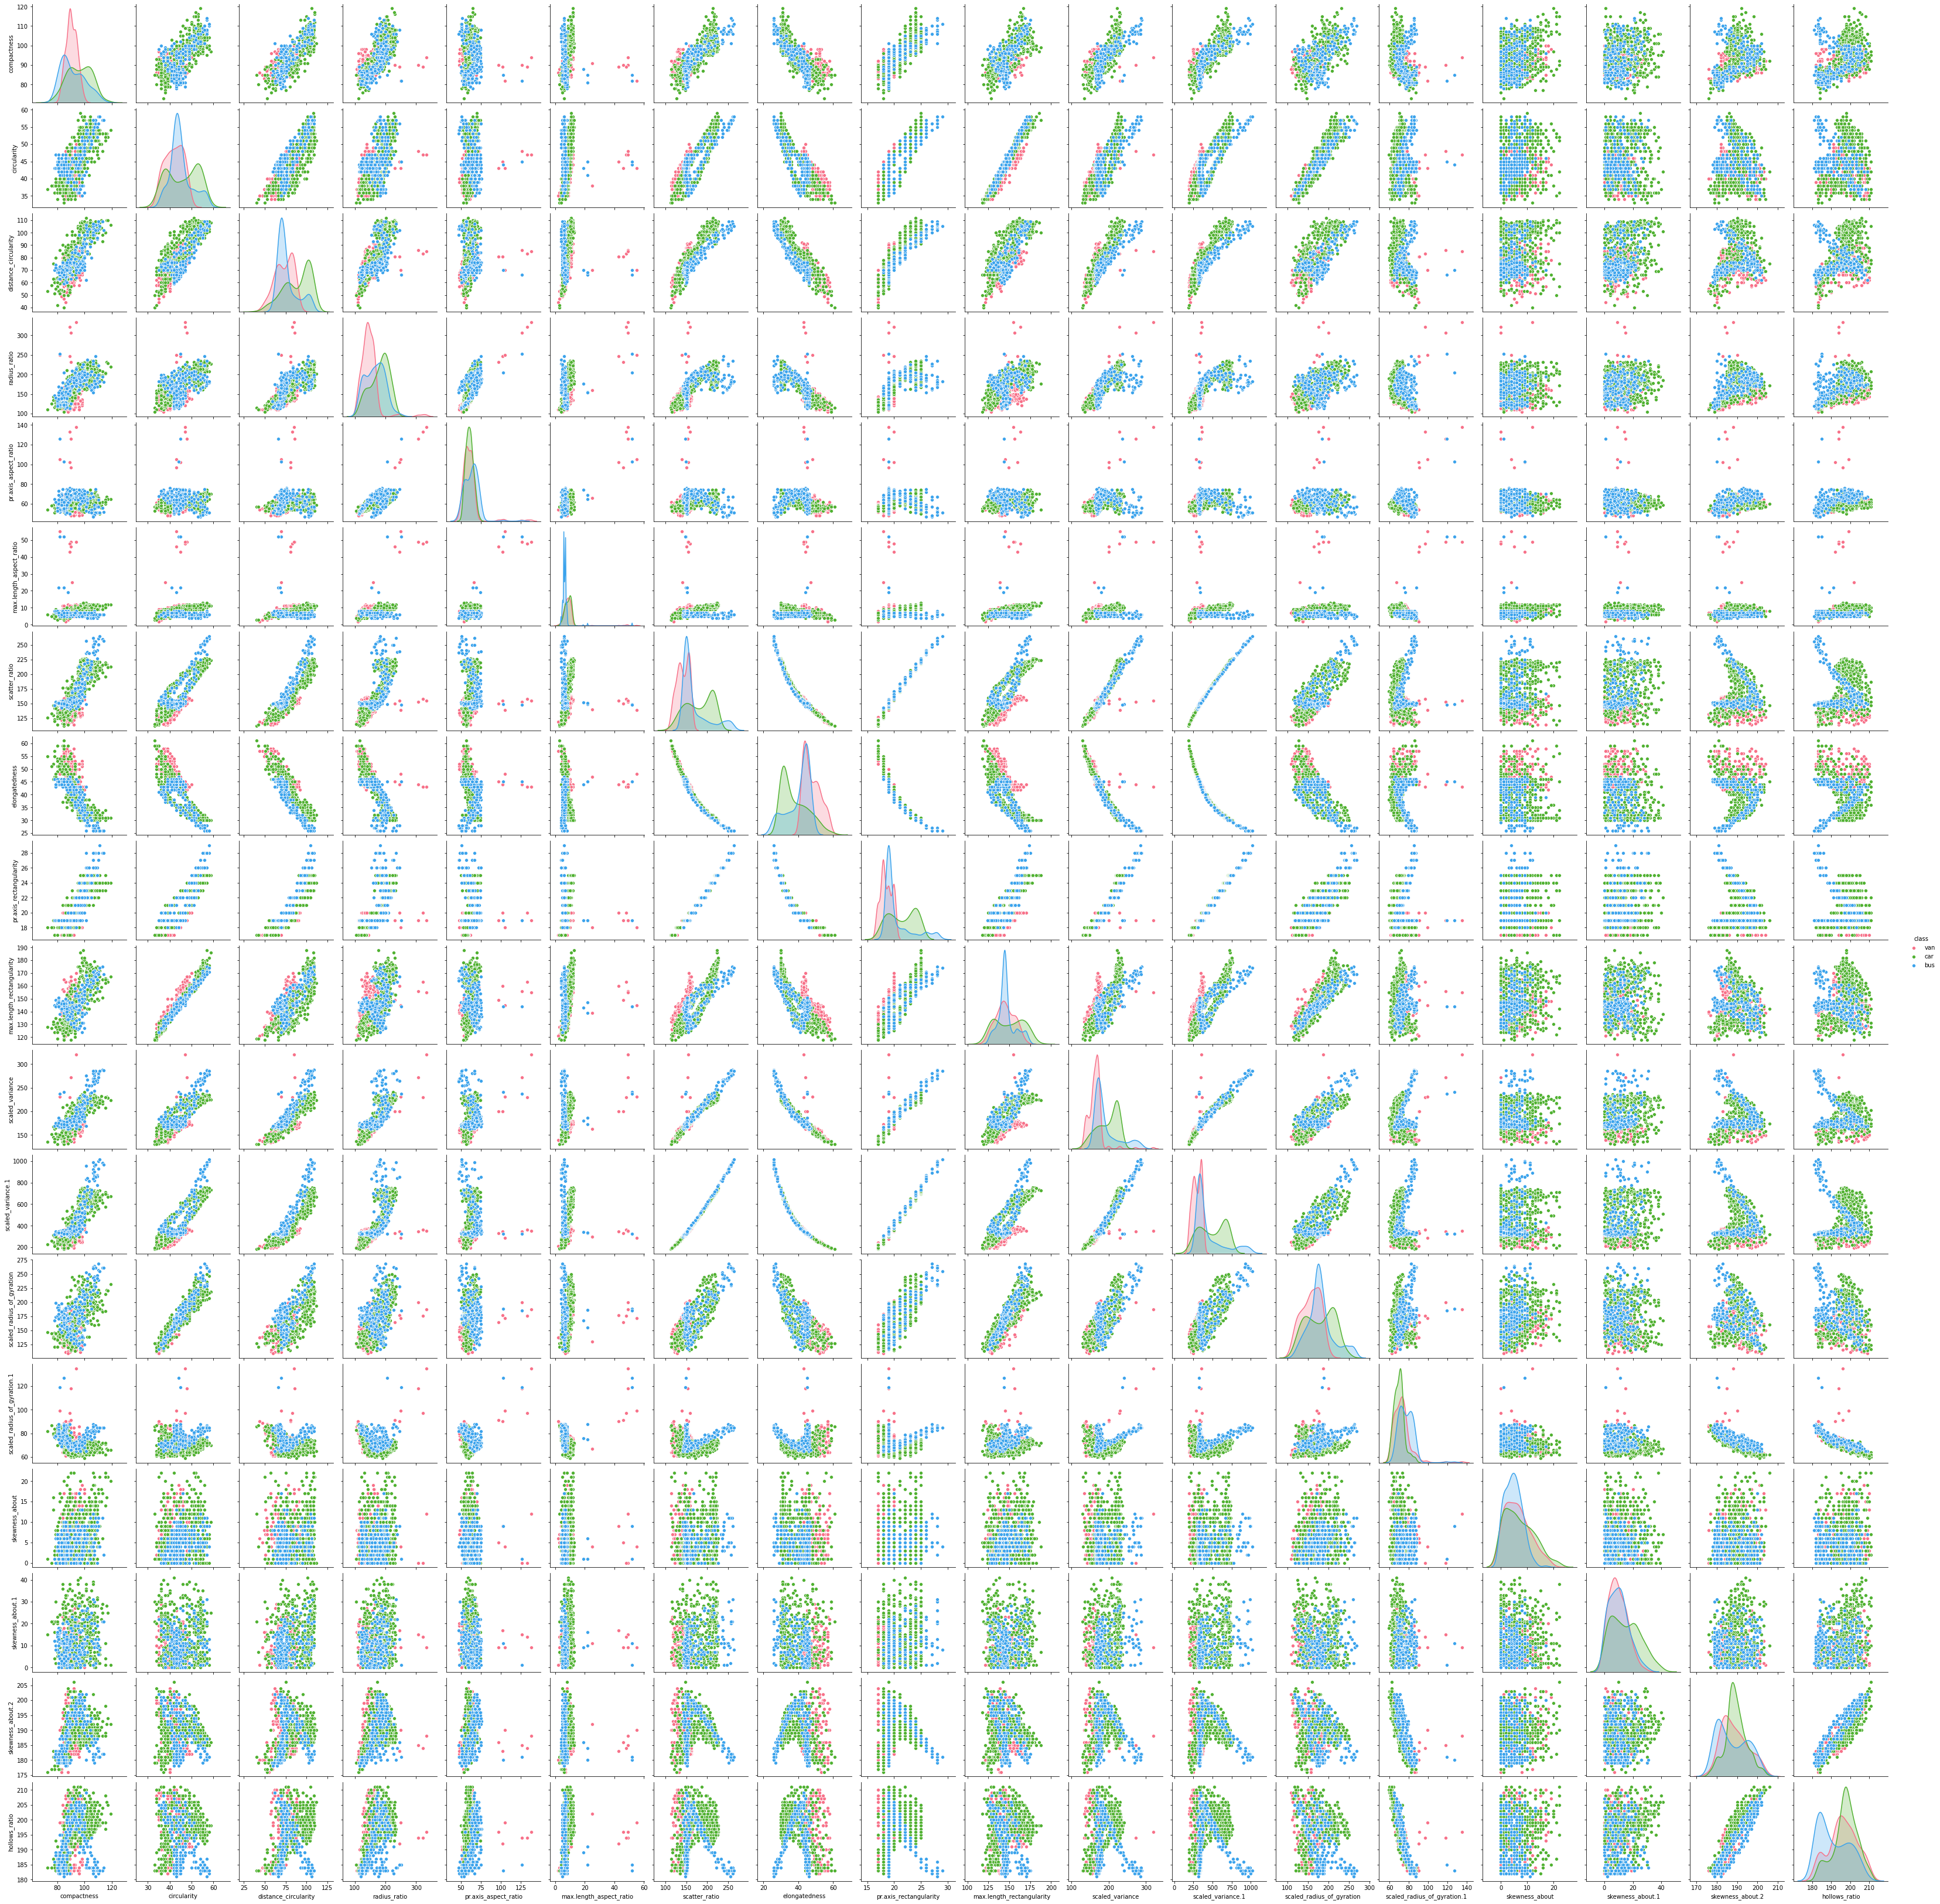

In [17]:
# Visualization the dataframe
sns_plot = sns.pairplot(data, hue = 'class', diag_kind = 'kde', palette = 'husl')
# # sns_plot.savefig("pairplot.png")
# from IPython.display import Image
# plt.clf() # Clean parirplot figure from sns 
# Image(filename='pairplot.png') # Show pairplot as image

In column elongatedness, we can distinguish the class elements clearly. Also, we can see, this column has some good linear relationships with other columns.

We can see that some columns have positive linear relationships, and some have negative relationships.

From the paiplot, there are some extreme outliers we can see, such can affect our model so we will have to eliminate them soon.

In [18]:
# Convert the object variable to numerical variable(Category)
from sklearn.preprocessing import LabelEncoder
data['class'] = LabelEncoder().fit_transform(data['class'])

In [19]:
data['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

0 - Bus,
1 - Car,
2 - Van

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.692692              0.792391   
circularity                     0.692692     1.000000              0.798615   
distance_circularity            0.792391     0.798615              1.000000   
radius_ratio                    0.691514     0.623025              0.772216   
pr.axis_aspect_ratio            0.092981     0.149050              0.160660   
max.length_aspect_ratio         0.148249     0.247416              0.263860   
scatter_ratio                   0.813005     0.860255              0.908080   
elongatedness                  -0.788660    -0.828703             -0.912964   
pr.axis_rectangularity          0.813437     0.857778              0.896170   
max.length_rectangularity       0.676143     0.965775              0.774902   
scaled_variance                 0.764527     0.808532              0.865570   
scaled_variance.1               0.818649     0.852543              0.890522   
scaled_radius_of_gyration       0.585141     0.936020              0.706017   
scaled_radius_of_gyration.1    -0.252888     0.059084             -0.230268   
skewness_about                  0.236157     0.146629              0.115355   
skewness_about.1                0.156874    -0.015655              0.264401   
skewness_about.2                0.298243    -0.111988              0.148065   
hollows_ratio                   0.365552     0.038332              0.333976   
class                          -0.033796    -0.164423             -0.062914   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.691514              0.092981   
circularity                      0.623025              0.149050   
distance_circularity             0.772216              0.160660   
radius_ratio                     1.000000              0.664815   
pr.axis_aspect_ratio             0.664815              1.000000   
max.length_aspect_ratio          0.448575              0.648184   
scatter_ratio                    0.738820              0.105753   
elongatedness                   -0.792890             -0.184793   
pr.axis_rectangularity           0.711722              0.079628   
max.length_rectangularity        0.571000              0.128788   
scaled_variance                  0.797715              0.274370   
scaled_variance.1                0.726119              0.091910   
scaled_radius_of_gyration        0.539235              0.123788   
scaled_radius_of_gyration.1     -0.182710              0.151941   
skewness_about                   0.051114             -0.057395   
skewness_about.1                 0.174846             -0.033904   
skewness_about.2                 0.381634              0.239317   
hollows_ratio                    0.469584              0.267531   
class                           -0.185782             -0.099308   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.813005   
circularity                                 0.247416       0.860255   
distance_circularity                        0.263860       0.908080   
radius_ratio                                0.448575       0.738820   
pr.axis_aspect_ratio                        0.648184       0.105753   
max.length_aspect_ratio                     1.000000       0.166767   
scatter_ratio                               0.166767       1.000000   
elongatedness                              -0.180055      -0.973386   
pr.axis_rectangularity                      0.161861       0.992090   
max.length_rectangularity                   0.305943       0.810644   
scaled_variance                             0.319475       0.951923   
scaled_variance.1                           0.144626       0.996320   
scaled_radius_of_gyration                   0.189681       0.800819   
scaled_radius_of_gyration.1                 0.294619      -0.028814   
skewness_about                            

<AxesSubplot:>

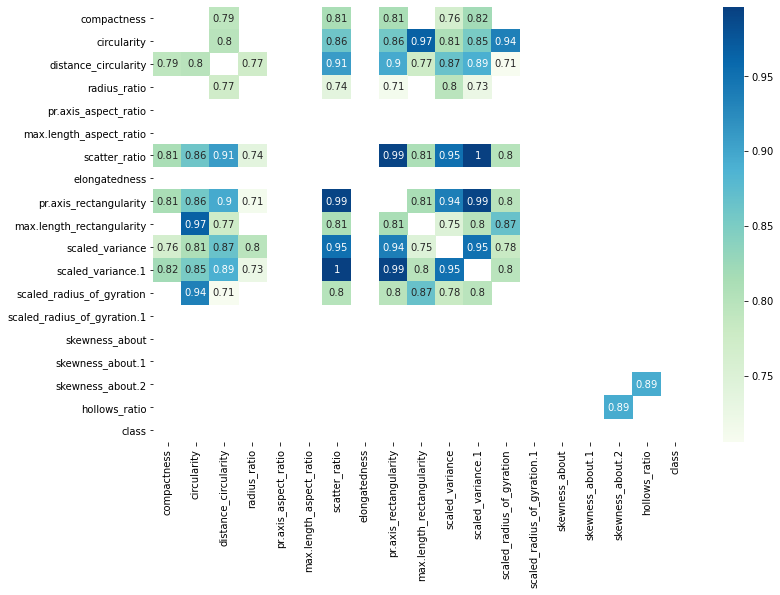

In [20]:
# Checking the correlation of the dataframe
display(data.corr())
df_corr = data.corr()
cor = df_corr[(df_corr >= 0.70) & (df_corr < 1.0)] # For maximum correlation
plt.figure(figsize = (12,8))
sns.heatmap(cor, cmap = 'GnBu', annot = True)

<AxesSubplot:>

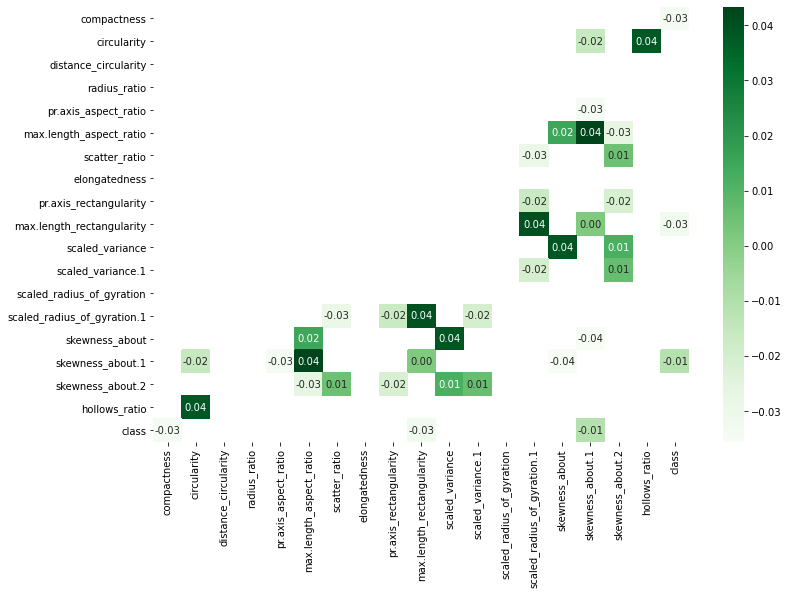

In [23]:
cor = df_corr[(df_corr < 0.05) & (df_corr > -0.05)] # Minimum correlation for the target column
plt.figure(figsize = (12,8))
sns.heatmap(cor, cmap = 'Greens', annot = True, fmt = '.2f')

In [24]:
# Drop the columns
drop_column = ['compactness', 'max.length_rectangularity', 'skewness_about.1', # These columns have a low correlation with the target column 
              'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1'] # These columns are highly correlated with each other
data.drop(drop_column, axis = 1, inplace = True)

Comparing the maximum and minimum correlations, columns that were low correlated and highly correlated are removed. Here, why highly correlated were removed, because it makes our model overfit.

In [25]:
# Checking the dataset again
data.head()

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
0         48.0                  83.0         178.0                  72.0   
1         41.0                  84.0         141.0                  57.0   
2         50.0                 106.0         209.0                  66.0   
3         41.0                  82.0         159.0                  63.0   
4         44.0                  70.0         205.0                 103.0   

   max.length_aspect_ratio  scatter_ratio  elongatedness  \
0                     10.0          162.0           42.0   
1                      9.0          149.0           45.0   
2                     10.0          207.0           32.0   
3                      9.0          144.0           46.0   
4                     52.0          149.0           45.0   

   scaled_radius_of_gyration  scaled_radius_of_gyration.1  skewness_about  \
0                      184.0                         70.0             6.0   
1                      158.0                         72.0             9.0   
2                      220.0                         73.0            14.0   
3                      127.0                         63.0             6.0   
4                      188.0                        127.0             9.0   

   skewness_about.2  hollows_ratio  class  
0             187.0          197.0      2  
1             189.0          199.0      2  
2             188.0          196.0      1  
3             199.0          207.0      2  
4             180.0          183.0      0

<AxesSubplot:>

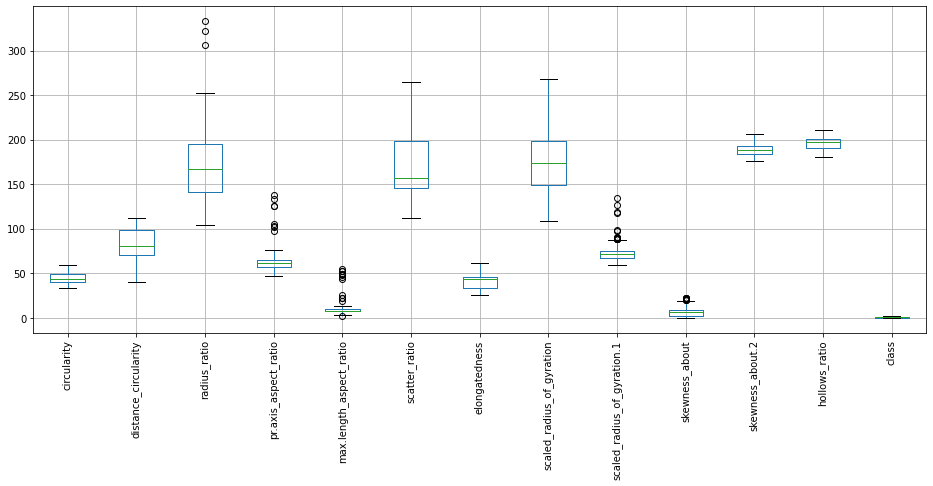

In [26]:
# Getting the outliers by using boxplot
data.boxplot(figsize = (16, 6), rot = 90)

<AxesSubplot:>

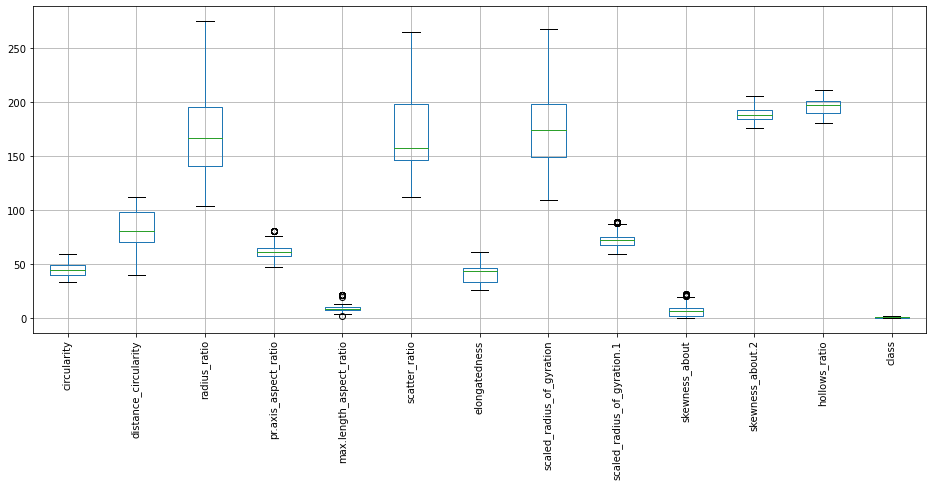

In [27]:
# Removing the extreme outliers
data['radius_ratio'] = np.where((data['radius_ratio']) > 275, 275, data['radius_ratio'])
data['pr.axis_aspect_ratio'] = np.where((data['pr.axis_aspect_ratio']) > 80, 80, data['pr.axis_aspect_ratio'])
data['max.length_aspect_ratio'] = np.where((data['max.length_aspect_ratio']) > 21, 21, data['max.length_aspect_ratio'])
data['scaled_radius_of_gyration.1'] = np.where((data['scaled_radius_of_gyration.1']) > 89, 89, data['scaled_radius_of_gyration.1']) 
data.boxplot(figsize = (16, 6), rot = 90) # Boxplot

I eliminated the extreme outliers that were affecting the dataset. Now, we can see good graph. Here, removing all outliers may lose some information, so I didn't remove all outliers.

In [28]:
# Splitting into training set and testing set
X = data.drop(['class'], axis = 1)
y = data['class']

In [29]:
# Here, I am splitting the dataset into a 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 3)

In [30]:
# Applying a standard scaler for scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.transform(X_test)

## SVM

In [31]:
from sklearn import svm
clf = svm.SVC()

In [32]:
# Without parameter
clf.fit(sc_X_train , y_train)
print("Training Score:-", clf.score(sc_X_train, y_train))
print("Testing Score:-", clf.score(sc_X_test, y_test))
y_pred = clf.predict(sc_X_test)

Training Score:- 0.964527027027027
Testing Score:- 0.9606299212598425


In [33]:
# Finding best value of C and gamma for SVM
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
              {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search = GridSearchCV(estimator = clf,
                           param_grid = parameters,
                           cv = 5)
grid_search = grid_search.fit(sc_X_train, y_train)
grid_search.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [34]:
# Adding these parameters
clf = svm.SVC(C = 100, gamma = 0.01)
clf.fit(sc_X_train , y_train)
print("Training Score:-", clf.score(sc_X_train, y_train))
print("Testing Score:-", clf.score(sc_X_test, y_test))
y_pred = clf.predict(sc_X_test)

Training Score:- 0.9881756756756757
Testing Score:- 0.9881889763779528


In [35]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[ 65,   0,   0],
       [  1, 126,   2],
       [  0,   0,  60]], dtype=int64)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        65
           1       1.00      0.98      0.99       129
           2       0.97      1.00      0.98        60

    accuracy                           0.99       254
   macro avg       0.98      0.99      0.99       254
weighted avg       0.99      0.99      0.99       254



In SVM, the algorithm performs very well. The training and testing score is excellent even, the F1 score, precision, and recall are great. The confusion matrix almost identified all elements correctly.

## PCA

In [37]:
X_std =  StandardScaler().fit_transform(X)          
cov_matrix = np.cov(X_std.T)

In [38]:
# Find eigenvalue and eigenvector
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [39]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [40]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_explained)

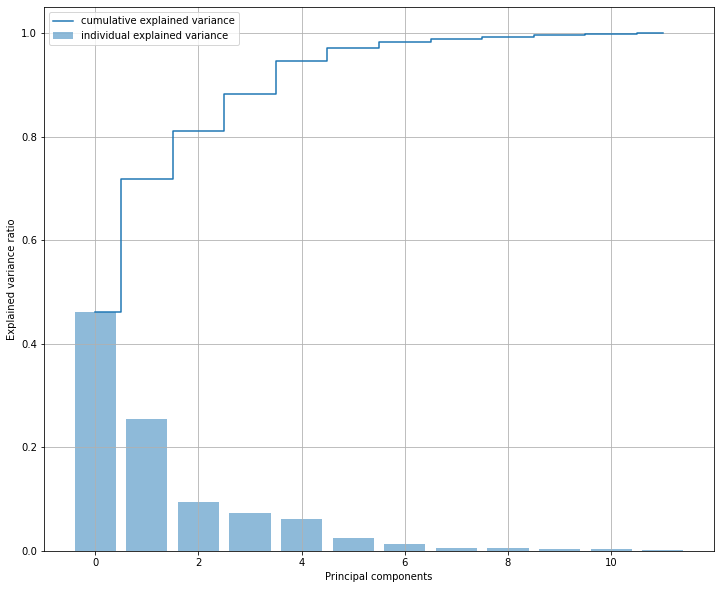

In [41]:
plt.figure(figsize = (12, 10))
plt.bar(range(0,12), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,12),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.grid()
plt.show()

Principal components captured 95% of the variance - Total components are 6

In [42]:
P_reduce = np.array(eigvectors_sorted[0:6])   # Reducing from 12 to 6 dimension space
X_std_4D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe 

In [43]:
# splitting the dataset into a 70/30
X_train, X_test, y_train, y_test = train_test_split(Proj_data_df, y, test_size = 0.3, stratify = y, random_state = 3)

## SVM With PCA

In [44]:
# Without parameter
clf = svm.SVC()
clf.fit(X_train , y_train)
print("Training Score:-", clf.score(X_train, y_train))
print("Testing Score:-", clf.score(X_test, y_test))
y_pred = clf.predict(X_test)

Training Score:- 0.9358108108108109
Testing Score:- 0.9173228346456693


In [45]:
# Finding best value of C and gamma for SVM
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
              {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search = GridSearchCV(estimator = clf,
                           param_grid = parameters,
                           cv = 5)
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [46]:
# Adding these parameters
clf = svm.SVC(C = 100, gamma = 0.01)
clf.fit(X_train , y_train)
print("Training Score:-", clf.score(X_train, y_train))
print("Testing Score:-", clf.score(X_test, y_test))
y_pred = clf.predict(X_test)

Training Score:- 0.9324324324324325
Testing Score:- 0.9291338582677166


In [47]:
confusion_matrix(y_test, y_pred)

array([[ 61,   4,   0],
       [  2, 122,   5],
       [  2,   5,  53]], dtype=int64)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        65
           1       0.93      0.95      0.94       129
           2       0.91      0.88      0.90        60

    accuracy                           0.93       254
   macro avg       0.93      0.92      0.93       254
weighted avg       0.93      0.93      0.93       254



In SVM with PCA, the algorithm performs well. The training and testing score is fine even, the F1 score, precision, and recall are good. Adding the parameters of C and gamma improve the model's performance. The confusion matrix almost identified all elements correctly. 

## Conclusion

SVM algorithm works great in this datset. Dropping some of the columns, which were affecting the model, also helped in improving the model. While using SVM with PCA, that was helped a lot in this model. Reducing the columns also improved to get good accuracy from six excellent column. The impact of the model by using SVM with PCA, they can distinguish the most of silhouette corrctly. In my opinion, dimension reduction technique PCA is good for this dataset.